In [1]:
import numpy as np
import csv
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
with open('./results/run-line_AMP_corrected_velocity_LaFanLine_21_08_2021-00_36-tag-Reward_Average_Reward.csv', mode='r') as csvfile:

    iterator = csv.reader(csvfile, delimiter=',')
    # row_count = sum(1 for row in iterator)
    avgRewards = np.zeros((row_count, 2))

    count = 0
    for row in iterator:
        if count == 0:
            print(f'Column names are {", ".join(row)}')
            count += 1
        else:
            # print("hello?")
            # print(row)
            avgRewards[count,0] = float(row[1])
            avgRewards[count,1] = float(row[2])
            count += 1

with open('./results/run-line_AMP_corrected_velocity_LaFanLine_21_08_2021-00_36-tag-Reward_Goal_Reward.csv', mode='r') as csvfile:

    iterator = csv.reader(csvfile, delimiter=',')
    # row_count = sum(1 for row in iterator)
    goalRewards = np.zeros((row_count, 2))

    count = 0
    for row in iterator:
        if count == 0:
            print(f'Column names are {", ".join(row)}')
            count += 1
        else:
            # print("hello?")
            # print(row)
            goalRewards[count,0] = float(row[1])
            goalRewards[count,1] = float(row[2])
            count += 1

with open('./results/run-line_AMP_corrected_velocity_LaFanLine_21_08_2021-00_36-tag-Reward_Style_Reward.csv', mode='r') as csvfile:

    iterator = csv.reader(csvfile, delimiter=',')
    # row_count = sum(1 for row in iterator)
    styleRewards = np.zeros((row_count, 2))

    count = 0
    for row in iterator:
        if count == 0:
            print(f'Column names are {", ".join(row)}')
            count += 1
        else:
            # print("hello?")
            # print(row)
            styleRewards[count,0] = float(row[1])
            styleRewards[count,1] = float(row[2])
            count += 1

Column names are Wall time, Step, Value
Column names are Wall time, Step, Value
Column names are Wall time, Step, Value


In [15]:
styleRewards

array([[0.00000000e+00, 0.00000000e+00],
       [1.63840000e+04, 5.01787364e-01],
       [2.45760000e+04, 4.88551140e-01],
       ...,
       [6.04569600e+06, 1.44286931e-01],
       [6.05388800e+06, 1.35023937e-01],
       [6.05798400e+06, 1.36123046e-01]])

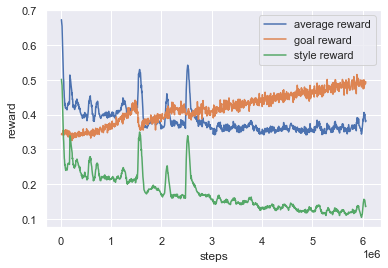

In [19]:
plt.plot(avgRewards[1:,0], avgRewards[1:,1], label='average reward')
plt.plot(goalRewards[1:,0], goalRewards[1:,1], label='goal reward')
plt.plot(styleRewards[1:,0], styleRewards[1:,1], label='style reward')
plt.ylabel("reward")
plt.xlabel("steps")
# plt.title("average reward")
plt.legend()
sns.set()
plt.savefig('all_rewards.png', dpi=200)
plt.show()

In [24]:
with open('./results/run-line_AMP_end_episode_0_LaFanLine_19_08_2021-22_24-tag-Reward_Average_Reward.csv', mode='r') as csvfile:

    iterator = csv.reader(csvfile, delimiter=',')
    # row_count = sum(1 for row in iterator)
    avgRewards2 = np.zeros((row_count, 2))

    count = 0
    for row in iterator:
        if count == 0:
            print(f'Column names are {", ".join(row)}')
            count += 1
        else:
            # print("hello?")
            # print(row)
            avgRewards2[count,0] = float(row[1])
            avgRewards2[count,1] = float(row[2])
            count += 1

Column names are Wall time, Step, Value


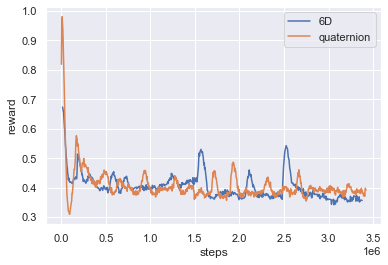

In [30]:
plt.plot(avgRewards[1:550,0], avgRewards[1:550,1], label='6D')
plt.plot(avgRewards2[1:,0], avgRewards2[1:,1], label='quaternion')
plt.ylabel("reward")
plt.xlabel("steps")
# plt.title("average reward")
plt.legend()
sns.set()
plt.savefig('quater_vs_6D.png', dpi=200)
plt.show()

In [26]:
avgRewards2.shape

(835, 2)

In [31]:
def read_csv(filename):

    with open(filename, mode='r') as csvfile:
        row_count = sum(1 for row in csvfile)

    with open(filename, mode='r') as csvfile:
        iterator = csv.reader(csvfile, delimiter=',')
        # row_count = sum(1 for row in iterator)
        data = np.zeros((row_count, 2))

        count = 0
        for row in iterator:
            if count == 0:
                count += 1
            else:
                # print("hello?")
                # print(row)
                data[count,0] = float(row[1])
                data[count,1] = float(row[2])
                count += 1

    return data

In [33]:
cross_G_loss = read_csv('./results/run-retargeting_loss_James_to_Ortiz_03_09_2021-20_31-tag-Test_AE_G_loss.csv')
cross_ee_loss = read_csv('./results/run-retargeting_loss_James_to_Ortiz_03_09_2021-20_31-tag-Test_AE_ee_loss.csv')
cross_adv_loss = read_csv('./results/run-retargeting_loss_James_to_Ortiz_03_09_2021-20_31-tag-Test_AE_adv_loss.csv')
cross_discrim_loss = read_csv('./results/run-retargeting_loss_James_to_Ortiz_03_09_2021-20_31-tag-Test_Discriminator_D_loss.csv')

intra_G_loss = read_csv('./results/run-retargeting_loss_Ortiz_to_Mousey_06_09_2021-18_18-tag-Test_AE_G_loss.csv')
intra_ee_loss = read_csv('./results/run-retargeting_loss_Ortiz_to_Mousey_06_09_2021-18_18-tag-Test_AE_ee_loss.csv')
intra_adv_loss = read_csv('./results/run-retargeting_loss_Ortiz_to_Mousey_06_09_2021-18_18-tag-Test_AE_adv_loss.csv')
intra_discrim_loss = read_csv('./results/run-retargeting_loss_Ortiz_to_Mousey_06_09_2021-18_18-tag-Test_Discriminator_D_loss.csv')

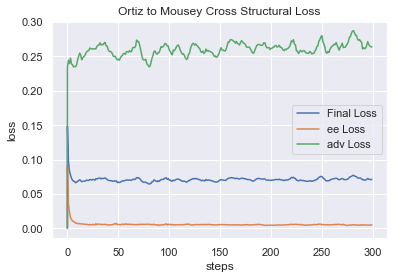

In [45]:
plt.plot(intra_G_loss[:,0], intra_G_loss[:,1], label='Final Loss')
plt.plot(intra_ee_loss[:,0], intra_ee_loss[:,1], label='ee Loss')
plt.plot(intra_adv_loss[:,0], intra_adv_loss[:,1], label='adv Loss')
# plt.plot(avgRewards2[1:,0], avgRewards2[1:,1], label='quaternion')
plt.ylabel("loss")
plt.xlabel("steps")
plt.title("Ortiz to Mousey Cross Structural Loss")
plt.legend()
sns.set()
plt.savefig('intra_structural_loss.png', dpi=200)
plt.show()

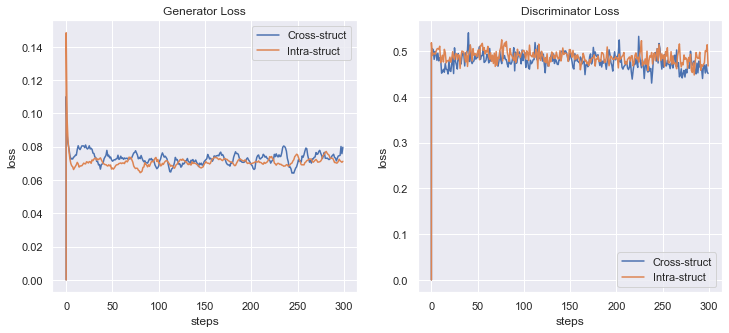

In [49]:
fig,axs = plt.subplots(1,2, figsize=(12,5))
axs[0].plot(cross_G_loss[:,0], cross_G_loss[:,1], label='Cross-struct')
axs[0].plot(intra_G_loss[:,0], intra_G_loss[:,1], label='Intra-struct')
# plt.plot(avgRewards2[1:,0], avgRewards2[1:,1], label='quaternion')
axs[0].set_ylabel("loss")
axs[0].set_xlabel("steps")
axs[0].set_title("Generator Loss")
axs[0].legend()

axs[1].plot(cross_discrim_loss[:,0], cross_discrim_loss[:,1], label='Cross-struct')
axs[1].plot(intra_discrim_loss[:,0], intra_discrim_loss[:,1], label='Intra-struct')
# plt.plot(avgRewards2[1:,0], avgRewards2[1:,1], label='quaternion')
axs[1].set_ylabel("loss")
axs[1].set_xlabel("steps")
axs[1].set_title("Discriminator Loss")
axs[1].legend()
sns.set()
plt.savefig('cross_vs_intra.png', dpi=200)
plt.show()